In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic-training-data.csv")

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df=df.drop(["PassengerId","Cabin","Name","Ticket"],axis=1)

In [7]:
median1=df["Age"].median()
df["Age"]=df["Age"].replace(np.nan,median1)

In [8]:
mode1=df["Embarked"].mode().values[0]
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
df = pd.get_dummies(df,columns =["Sex","Embarked","Pclass"],drop_first = True)

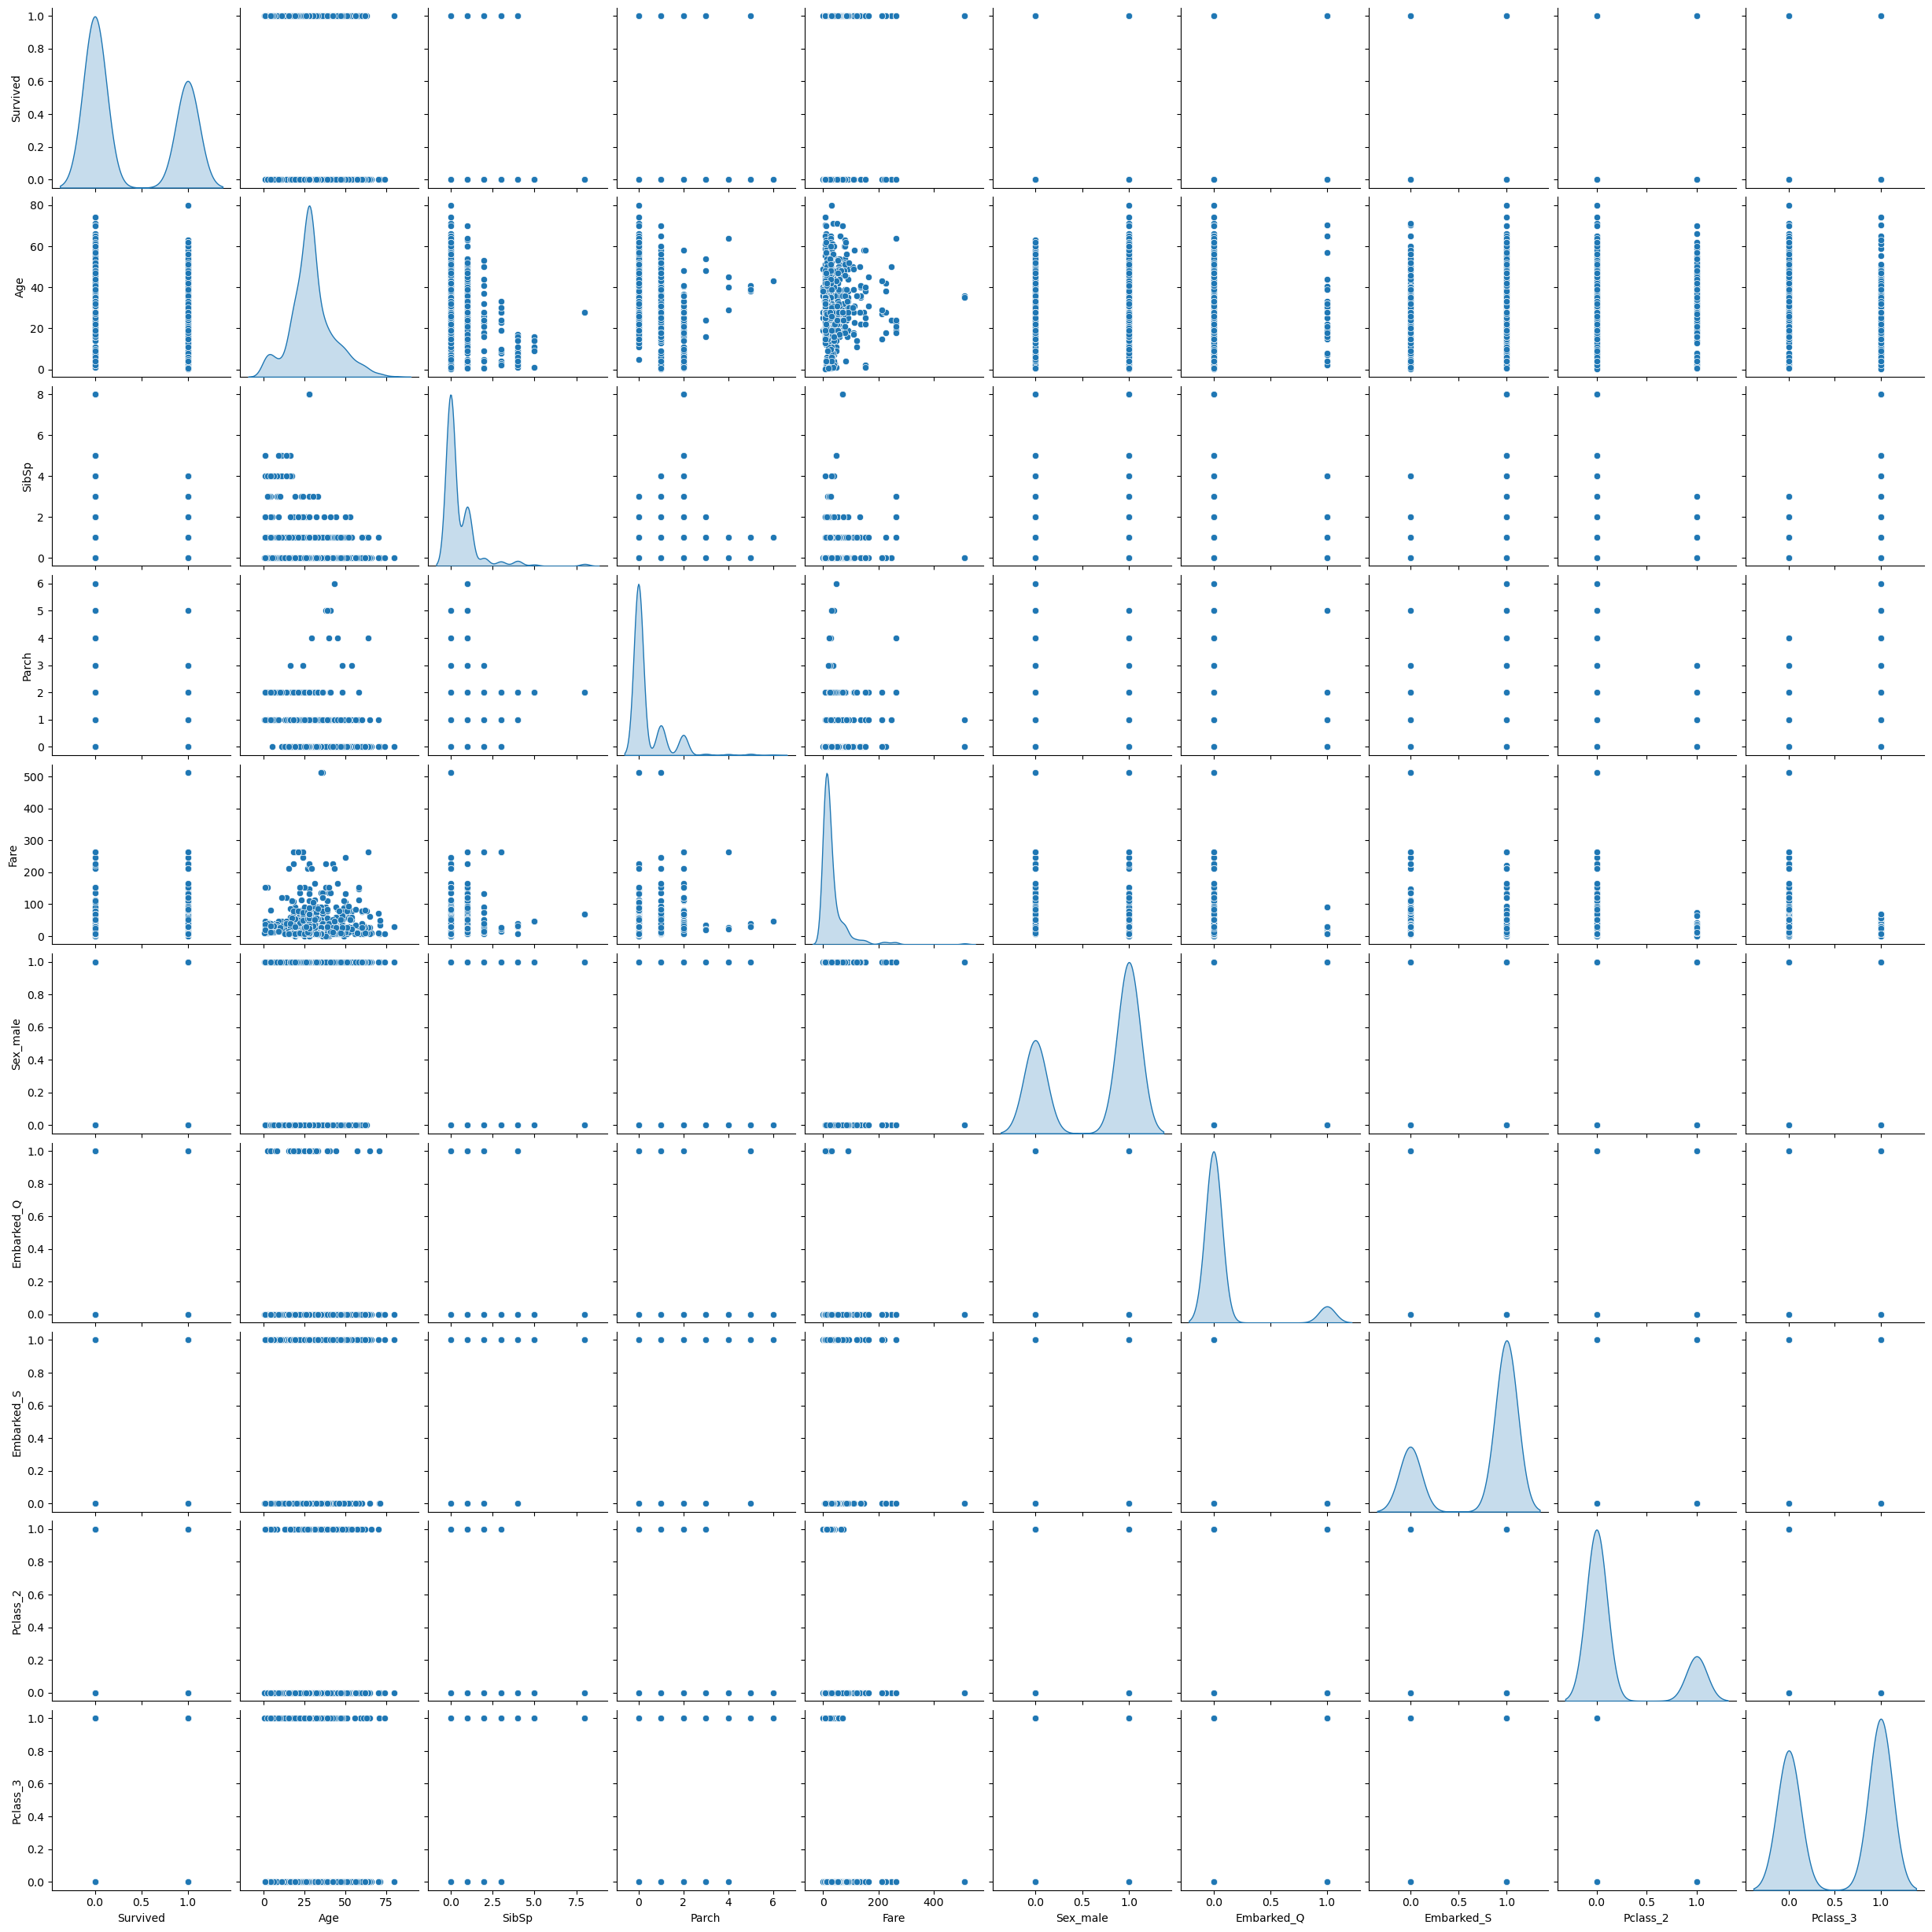

In [11]:
sns.pairplot(df,diag_kind="kde")

In [12]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [13]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [14]:
model_1=LogisticRegression(solver="liblinear")
model_1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [15]:
model_1.score(x_train,y_train)

0.8089887640449438

In [16]:
model_1.score(x_test,y_test)

0.8022388059701493

In [17]:
model_1=KNeighborsClassifier()
model_1.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
model_1.score(x_train,y_train)

0.78330658105939

In [19]:
model_1.score(x_test,y_test)

0.7238805970149254

In [20]:
predictions = model_1.predict(x_test)

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,predictions)

0.7238805970149254

In [23]:
df1=df.copy()

In [24]:
median1=df1["Age"].median()
df1["Age"]=df1["Age"].replace(np.nan,median1)